In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')
# add in PLT params here

model_names = ['resnet18', 'resnet50', 'resnet101', 'MobileNetV2']
aug_names = ['combo', 'hflip', 'rotation', 'colorjitter', 'fivecrop', 'orig']

In [3]:
# Single augmentation accuracy comparison
results = pd.concat([pd.read_csv('../results/resnet50_agg_fs'),
                     pd.read_csv('../results/resnet101_agg_fs'),
                     pd.read_csv('../results/resnet18_agg_fs'),
                     pd.read_csv('../results/MobileNetV2_agg_fs')])
orig_accs = results[(results['aug'] == 'orig') & (results['agg']=='mean')]
def get_diff_top1(row):
    top1_orig_acc = orig_accs[orig_accs['model'] == row['model']]['top1'].values[0]
    return row['top1'] - top1_orig_acc
def get_diff_top5(row):
    top5_orig_acc = orig_accs[orig_accs['model'] == row['model']]['top5'].values[0]
    return row['top5'] - top5_orig_acc
results['top1_diff'] = results.apply(get_diff_top1, axis=1)
results['top5_diff'] = results.apply(get_diff_top5, axis=1)

AttributeError: 'AxesSubplot' object has no attribute 'set_xtick_labels'

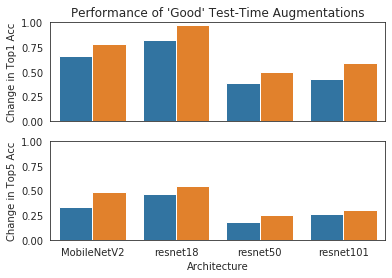

In [115]:
# single augmentation; grouped bar chart of differences between original accuracy vs augmentation 
sns.set_style('white')
model_order = ["MobileNetV2", "resnet18", "resnet50", "resnet101"]
aug_order = ['hflip', 'five_crop']
mean_results = results[(results['agg'] == 'mean') & (results['aug'] != 'orig')]
good_mean_results = mean_results[mean_results['aug'].isin(aug_order)]
fig, axs = plt.subplots(nrows=2, squeeze=False)
axs = axs.flatten()
sns.barplot(x='model', y='top1_diff', hue='aug', data=good_mean_results, ax=axs[0],
            hue_order=aug_order, order=model_order)
sns.barplot(x='model', y='top5_diff', hue='aug', data=good_mean_results, ax=axs[1],
            hue_order=aug_order, order=model_order)

axs[0].get_legend().set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlabel('')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Change in Top1 Acc')
axs[0].set_title("Performance of 'Good' Test-Time Augmentations")
axs[1].get_legend().set_visible(False)
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('Change in Top5 Acc')
axs[1].set_xlabel('Architecture')
axs[1].set_xtick_labels(['MobileNetV2', 'Resnet18', 'ResNet50', 'ResNet101'])

handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='upper right')

plt.tight_layout()

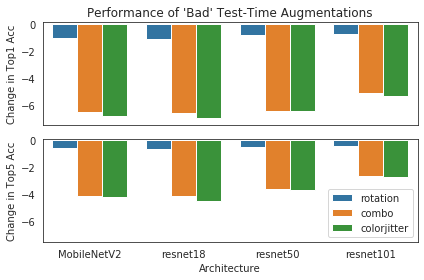

In [83]:
# single augmentation; grouped bar chart of differences between original accuracy vs augmentation 
sns.set_style('white')
model_order = ["MobileNetV2", "resnet18", "resnet50", "resnet101"]
aug_order = ['rotation', 'combo', 'colorjitter']
mean_results = results[(results['agg'] == 'mean') & (results['aug'] != 'orig')]
good_mean_results = mean_results[mean_results['aug'].isin(aug_order)]
fig, axs = plt.subplots(nrows=2, squeeze=False)
axs = axs.flatten()
sns.barplot(x='model', y='top1_diff', hue='aug', data=good_mean_results, ax=axs[0],
            hue_order=aug_order, order=model_order)
sns.barplot(x='model', y='top5_diff', hue='aug', data=good_mean_results, ax=axs[1],
            hue_order=aug_order, order=model_order)

axs[0].get_legend().set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlabel('')
axs[0].set_ylim(-7.5, .1)
axs[0].set_ylabel('Change in Top1 Acc')
axs[0].set_title("Performance of 'Bad' Test-Time Augmentations")
axs[1].get_legend().set_visible(False)
axs[1].set_ylim(-7.5, .1)
axs[1].set_ylabel('Change in Top5 Acc')
axs[1].set_xlabel('Architecture')
axs[1].set_xticks(['MobileNetV2', 'Resnet18', 'ResNet50', 'ResNet101'])
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='lower right')

plt.tight_layout()

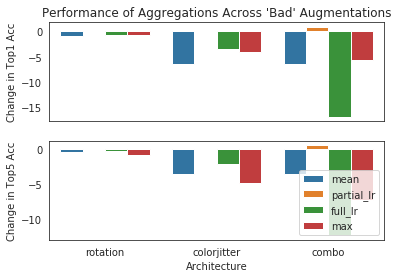

In [113]:
# Learning combinations of the single augmentations
# Show that this performs better than the simple average of the augmentations
# this normally does perform better....but with only 50 images from each class, not as good
# could produce 100 for a certian model to see if the # 
#of images changes things?
model_name = 'resnet50'
good_augs = ['hflip', 'five_crop']
bad_augs = ['rotation', 'colorjitter', 'combo']
aug_order = bad_augs
one_resnet = results[(results['model'] == model_name) & (results['aug'] != 'orig')]
one_resnet = one_resnet[one_resnet['aug'].isin(aug_order)]
#one_resnet = one_resnet[(one_resnet['agg'] != 'full_lr') & (one_resnet['agg'] != 'max')]

fig, axs = plt.subplots(nrows=2, squeeze=False)
axs = axs.flatten()
sns.barplot(x='aug', y='top1_diff', hue='agg', data=one_resnet, ax=axs[0],
            order=aug_order)
sns.barplot(x='aug', y='top5_diff', hue='agg', data=one_resnet, ax=axs[1],
            order=aug_order)

axs[0].get_legend().set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlabel('')
#axs[0].set_ylim(-7.5, .1)
axs[0].set_ylabel('Change in Top1 Acc')
axs[0].set_title("Performance of Aggregations Across 'Bad' Augmentations")
axs[1].get_legend().set_visible(False)
axs[1].set_ylabel('Change in Top5 Acc')
axs[1].set_xlabel('Architecture')
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='lower right')

#plt.tight_layout()


In [95]:
one_resnet

,Unnamed: 0,model,aug,agg,top1,top5,top1_diff,top5_diff
0,0,resnet50,hflip,mean,76.231855,93.042339,0.383065,0.175403
1,1,resnet50,hflip,partial_lr,76.233871,93.048387,0.385081,0.181452
2,2,resnet50,hflip,full_lr,76.606855,93.139113,0.758065,0.272177
3,3,resnet50,hflip,max,76.163306,92.858871,0.314516,-0.008065
5,5,resnet50,five_crop,mean,76.350806,93.114919,0.502016,0.247984
6,6,resnet50,five_crop,partial_lr,76.421371,93.153226,0.572581,0.286290
7,7,resnet50,five_crop,full_lr,75.866935,93.153226,0.018145,0.286290
8,8,resnet50,five_crop,max,76.266129,92.790323,0.417339,-0.076613
9,9,resnet50,colorjitter,mean,69.415323,89.195565,-6.433468,-3.671371
10,10,resnet50,colorjitter,partial_lr,75.828629,92.864919,-0.020161,-0.002016


In [ ]:
# Learning combinations of the aggregate augmentations
# Hope to show: now the aggregated augmentations benefit perforamnce, compared to before

In [3]:
# Ranking each augmentations - 10 ranked augmentations, by LR, OMP, and APAC
# this only makes sense with the combined data, so don't need to do with all augmentations
# three/four graphs, one for each architecture


In [ ]:
# Anytime augmentation comparison - sampling more brightness or more rotation

In [43]:
# Robustness graph
resnet18

,Unnamed: 0,model,aug,agg,top1,top5,top1_diff,top5_diff
2,2,resnet18,hflip,mean,70.290323,89.534274,0.818548,0.459677
3,3,resnet18,hflip,lr,70.389113,89.802419,0.917339,0.727823
4,4,resnet18,five_crop,mean,70.443548,89.616935,0.971774,0.542339
5,5,resnet18,five_crop,lr,69.086694,89.433468,-0.385081,0.358871
6,6,resnet18,colorjitter,mean,62.491935,84.572581,-6.979839,-4.502016
7,7,resnet18,colorjitter,lr,66.447581,86.997984,-3.024194,-2.076613
8,8,resnet18,rotation,mean,68.379032,88.457661,-1.092742,-0.616935
9,9,resnet18,rotation,lr,68.528226,88.731855,-0.943548,-0.342742
10,10,resnet18,combo,mean,62.850806,84.973790,-6.620968,-4.100806
11,11,resnet18,combo,lr,55.683468,78.989919,-13.788306,-10.084677
